<a href="https://colab.research.google.com/github/dlvvkfl88/MSAISCHOOL/blob/main/MS_AI_SCHOOL_60%EC%9D%BC%EC%B0%A8_%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀 앙상블 싥습

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### 데이터셋, 데이터 로더 생성

In [2]:
dataset = FashionMNIST(root ="/content/", train=True, transform=ToTensor(),download=True)

100%|██████████| 26421880/26421880 [00:02<00:00, 11874590.49it/s]


Extracting /content/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 201696.87it/s]


Extracting /content/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3777242.65it/s]


Extracting /content/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20312584.19it/s]

Extracting /content/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



In [3]:
train_set , val_set = train_test_split(dataset, test_size=0.1, random_state=777)

train_loader = DataLoader(train_set, batch_size=100, shuffle=True)
test_loader = DataLoader(val_set, batch_size=100, shuffle=False)

### 모델 선언

In [9]:
class LogisticRegression(nn.Module):
  def __init__(self, input_size, num_classes):
    super(LogisticRegression,self).__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self,x):
    out = self.linear(x)

    return out

### 하이퍼 파라미터 설정

In [10]:
input_size = 28*28
num_classes= 10
num_epoch = 10
lr =0.001
num_models= 5 # 앙상블 사용 모델 갯수

## 앙상블

In [12]:
models = [LogisticRegression(input_size, num_classes) for _ in range(num_models)]

print(models)

[LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
), LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
), LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
), LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
), LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)]


### 모델 ,손실함수 , 옵티마이저 정의

In [14]:
criterion = nn.CrossEntropyLoss()
optimizers = [optim.SGD(model.parameters(), lr=lr) for model in models]
print(optimizers)

[SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
), SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
), SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
), SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
), SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)]


## train loop

In [24]:
for epoch in range(num_epoch):
  for i, (images, labels) in enumerate(train_loader):
    # 데이터 로드
    images = images.reshape(-1, input_size)
    labels = labels

    # 순전파 및 손실 계산
    for j in range(num_models):
      outputs = models[j](images)
      loss = criterion(outputs, labels)



      # 역전파 및 가중치 업데이트
      optimizers[j].zero_grad()
      loss.backward()
      optimizers[j].step()

  # 검증 코드 추가 #
  # 이거는 미분 안하고 여기서 검증
  with torch.no_grad() :
    total, correct = 0,0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size)
        outputs = torch.zeros(images.size()[0], num_classes)
        labels = labels
        #앙상블 모델의 예측값 더하기

        for j in range(num_models):
          outputs += models[j](images)

        _, predicted = torch.max(outputs.data, 1 )
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    val_acc =100 * correct/total
    print(f"epoch [{epoch+1}/{num_epoch}], Val ACC >> {val_acc:.2f}%")




epoch [1/10], Val ACC >> 79.08%
epoch [2/10], Val ACC >> 79.33%
epoch [3/10], Val ACC >> 79.57%
epoch [4/10], Val ACC >> 79.55%
epoch [5/10], Val ACC >> 79.72%
epoch [6/10], Val ACC >> 79.83%
epoch [7/10], Val ACC >> 79.83%
epoch [8/10], Val ACC >> 80.08%
epoch [9/10], Val ACC >> 80.23%
epoch [10/10], Val ACC >> 80.22%


## Pytorc를 사용하여 소프트맥스 회귀 모델을 학습하고 예측하는 실습

In [77]:
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader , TensorDataset
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

## 아이리스 데이터 로드

In [83]:
iris = load_iris()
#

x = iris.data
y = iris.target
#print(x,y)

x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=777)

# convert data to pytorch tensor

x_train = torch.from_numpy(x_train).float() # 넘파이에서 텐서화 꼭필요
y_train = torch.from_numpy(y_train).float()
x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).float()

print(y_test)

tensor([2., 0., 2., 2., 1., 0., 2., 2., 0., 0., 2., 1., 1., 2., 2.])


### 데이터셋 데이터 로더 정의

In [85]:
train_dataset = TensorDataset(x_train, y_train) # 텐서로 변환하여 데이터셋 생성
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)

## 모델 구현

In [89]:
class SoftmaxRegression(nn.Module):
  def __init__(self, input_size, num_classes):
    super(SoftmaxRegression,self).__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self,x):
    out = self.linear(x)\

    return out

### 하이퍼파라미터 설정

In [86]:
input_size = 4
num_classes= 3
lr=0.01
num_epochs = 100


### 옵티마이저 loss 함수 모델 호출

In [90]:
model = SoftmaxRegression(input_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

### Train the Model

In [92]:
total_step = len(train_loader)
for epoch in range(num_epochs):
  for i , (inputs, labels) in enumerate(train_loader):
    # Foward Pass
    output = model(inputs)
    loss = criterion(output, labels)


    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



    # print하기
    if(i+1)%10 == 0:
      print("Epoch [{}/{}] , step [{}/{}], Loss : {:.4f}".format(
          epoch+1, num_epochs, i+1,total_step, loss.item()
      ))

RuntimeError: ignored

### Pytorch를 사용한 SVM 실습

In [93]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader , TensorDataset

### 데이터 생성

In [115]:
x = torch.randn(2500,2)

y = torch.where(x[:,0] > x[:,1], 1,-1).float()

dataset = TensorDataset(x,y)
loader = DataLoader(dataset , batch_size=36)

## SVM모델정의

### 모델,손실함수,옵티 생성

In [109]:
class SVM(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(2,1)

  def forward(self, x):
    return self.linear(x)




In [117]:
model = SVM()
criterion = nn.HingeEmbeddingLoss() # 양성 1 음성 -1 클래스로 지정되어 사용가능 (주어진입력 과 대상 사이
# 경계선 손실값 계산하는 함수) -> 이진분류 문제 손실함수 - > 모델
optimizer = optim.SGD(model.parameters(), lr=0.01)

## 모델 학습 loop

In [118]:
for epoch in range(100):
  for inputs, targets in loader:
    output = model(inputs)
    loss = criterion(output.squeeze(), targets)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  if (epoch+1) % 10 ==0:
    print(f"Epoch [{epoch+1}/ 50], Loss:{loss.item():4f}")

Epoch [10/ 50], Loss:-2.052123
Epoch [20/ 50], Loss:-3.974451
Epoch [30/ 50], Loss:-5.909729
Epoch [40/ 50], Loss:-7.848531
Epoch [50/ 50], Loss:-9.788814
Epoch [60/ 50], Loss:-11.729636
Epoch [70/ 50], Loss:-13.670534
Epoch [80/ 50], Loss:-15.611797
Epoch [90/ 50], Loss:-17.553419
Epoch [100/ 50], Loss:-19.495043


## 시각화

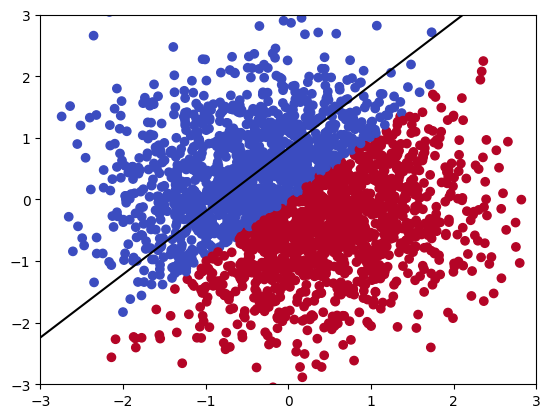

In [120]:
# 결정 경계 시각화
import matplotlib.pyplot as plt
import numpy as np

w = list(model.parameters())[0][0]
b = list(model.parameters())[1].item()
slope = (-w[0] / w[1]).detach().numpy()
intercept = (-b / w[1]).detach().numpy()
x_range = np.linspace(-3, 3, 100)
y_range = slope * x_range + intercept

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.plot(x_range, y_range, 'k-')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()